# Prediction using Unsupervised ML

# TSF GRIPMAR21 - Task2

# NAME : Sivasubramanian V

Implement **k-means clustering** using **THE IRIS DATASET**.
This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant.
**The dataset has four features:**
1 : Sepal length
2 : Sepal width
3 : Petal length
4 : Petal width.

The fifth column is for species, which holds the value for these types of plants.

# Importing the libraries.
**NumPy, Pandas,seaborn and Matplotlib,KMeans from sklearn.cluster.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn import datasets
from sklearn.cluster import KMeans

We’re reading the Iris dataset using the datasets.load_iris() method and storing the data in a data frame iris_df. After populating the data frame iris_df, we use the head() method on the dataset to see its first 10 records.

In [45]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


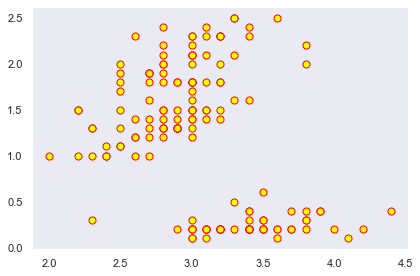

In [52]:
# Import scatter plot to evident the clusters
x = iris.data
y = iris.target

plt.scatter(x[:,1], x[:,3],
             color='YELLOW', marker='o', edgecolor='red', s=50)
plt.grid()
plt.tight_layout()
plt.show()

**Select all four features of the dataset in a variable called x.
 so that we can train our model with these features.
 For this, we use the iloc function on iris_df, and
 The column index (0,1,2,3) for the above four columns are used:

In [7]:
x = iris_df.iloc[:, [0,1,2,3]].values

There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.
This graph generally ends up shaped like an elbow, hence its name:

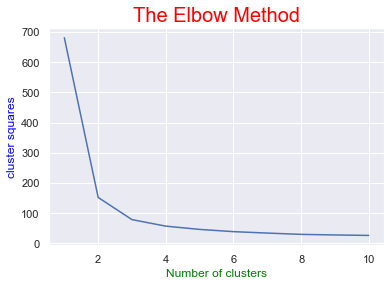

In [19]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method', color='red',size='20')
plt.xlabel('Number of clusters', color='green')
plt.ylabel('cluster squares', color='blue') # cluster squares
plt.show()

As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
Let’s implement k-means using k=3

# Implement K-means Clustering with k=3

In [20]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [21]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Finally, its time to visualize the three clusters that were formed with the optimal k value. We can clearly see three clusters in the image below, with each cluster represented by a different color.


# Visualizing Clustering

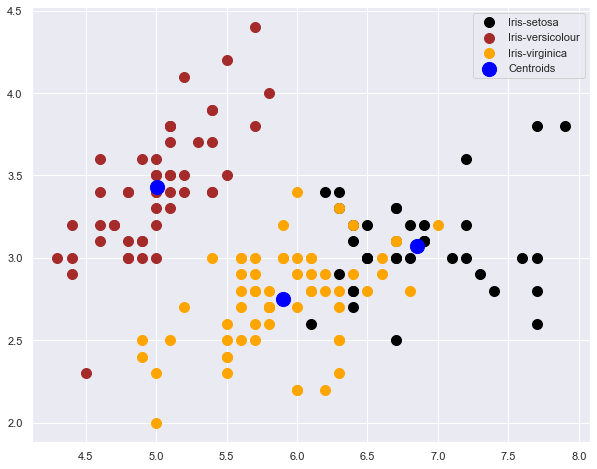

In [49]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'blue', label = 'Centroids')

plt.legend()

**We can clearly see the 3 BLUE centroids satisfied K-Means Effectively**